SALARY PREDICTIONS BASED ON JOB DESCRIPTIONS, 

The aim of this project is to analyze job features which lead to a better paid job and predict what would one's salary be given their job features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
train_features = pd.read_csv('/Users/andy/Desktop/data-2/train_features.csv')
train_target = pd.read_csv('/Users/andy/Desktop/data-2/train_salaries.csv')
test_features = pd.read_csv('/Users/andy/Desktop/data-2/test_features.csv')

In [3]:
train_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_target.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

the categorical values are - jobid, jobtype, degree, major, industry
the numerical values are - yearsExperience, milesFromMetropolis

In [8]:
train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [9]:
train_features.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685072564,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [10]:
train_features['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [11]:
train_features['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [12]:
train_features['major'].value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [13]:
train_features['industry'].value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [14]:
train_features['yearsExperience'].value_counts()

15    40312
1     40265
9     40235
3     40191
22    40187
8     40118
6     40095
18    40089
17    40072
7     40047
2     40045
4     40036
10    40032
23    40015
5     40013
20    39988
11    39949
16    39873
19    39860
24    39860
0     39839
14    39827
13    39826
21    39759
12    39467
Name: yearsExperience, dtype: int64

In [15]:
train_features['milesFromMetropolis'].value_counts()

99    10180
62    10175
63    10159
97    10155
41    10147
      ...  
26     9845
6      9840
18     9824
87     9815
20     9807
Name: milesFromMetropolis, Length: 100, dtype: int64

In [16]:
training = pd.merge(train_features, train_target, on= 'jobId')

Text(0.5, 1.0, 'Boxplot showing the ranges of all the salaries')

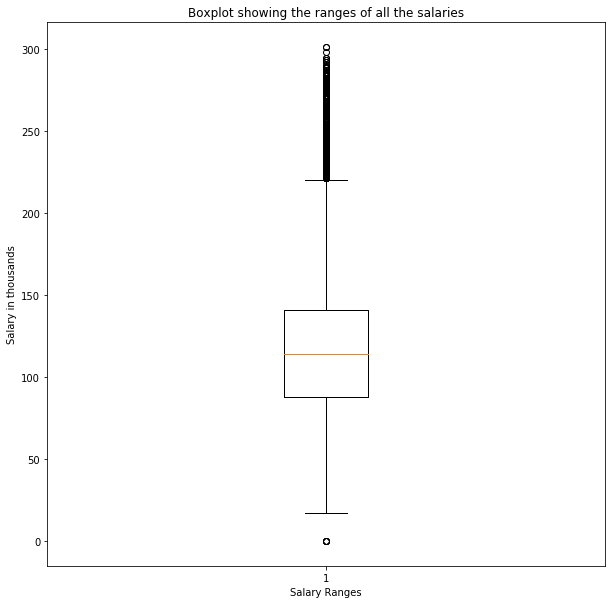

In [17]:
plt.figure(figsize = (10,10))
plt.boxplot(training["salary"])
plt.xlabel("Salary Ranges")
plt.ylabel("Salary in thousands")
plt.title("Boxplot showing the ranges of all the salaries")

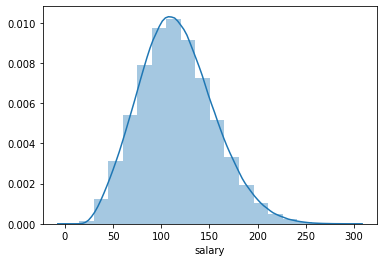

In [18]:
sns.distplot(training['salary'], bins = 20)
# add title
plt.show()

In [19]:
training["salary"].describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

In [20]:
## making sure not to include any salaries that are zero or below
training = training[training["salary"]>0]

In [21]:
training = training.drop_duplicates()

In [22]:
## getting the numeric value of the company Id
ids = []
for x in training["companyId"]:
    ids.append(x[4:])
training["id"] = ids

In [23]:
def scatterplots(col, data):
    plt.figure(figsize = (15,10))
    equation = np.polyfit(training[col], training["salary"], 1)
    x = np.arange(0,max(training[col])+1)
    plt.plot(x, x*equation[0] + equation[1], color = "black")
    plt.scatter(data[col], data["salary"], color = "grey")
    plt.xlabel(col)
    plt.ylabel("Salary in thousands")
    plt.show()
def snsplots(xs, orders,datas):
    plt.figure(figsize=(10,10))
    sns.boxplot(x = xs, y = "salary", data = datas, order = orders )
    plt.show()

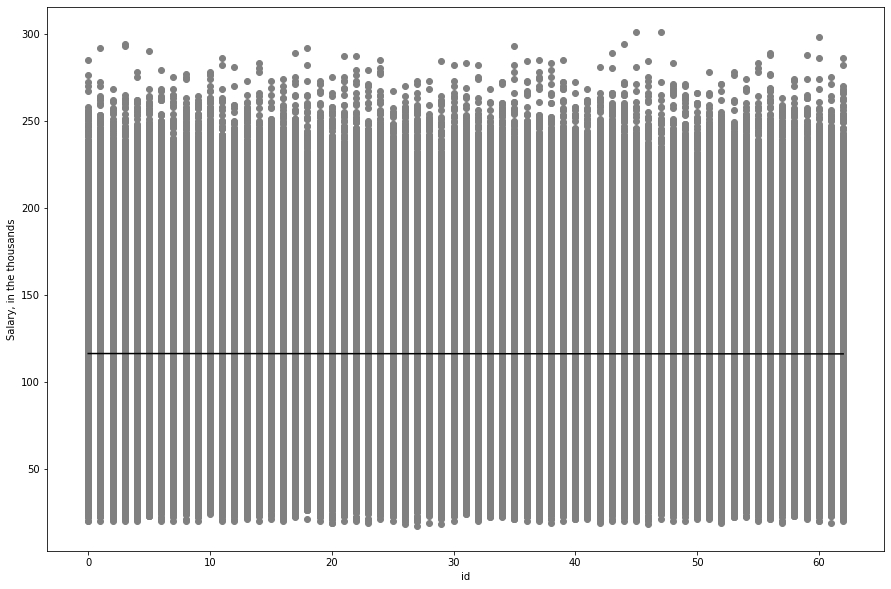

In [24]:
training["id"] = training["id"].astype(int)
# add title
# add legend for what the line means
scatterplots("id", training)

There does not seem to be a distinct correlation between the company id and the salary, which can be depicted by the best fit line. This will be double checked when the correlation between all the values will be calculated.

In [25]:

means = []
for x in np.sort(training["id"].unique()):
    comp = training[training["id"] == x]
    means.append(comp["salary"].mean())
    

Text(0, 0.5, 'Salary in thousands')

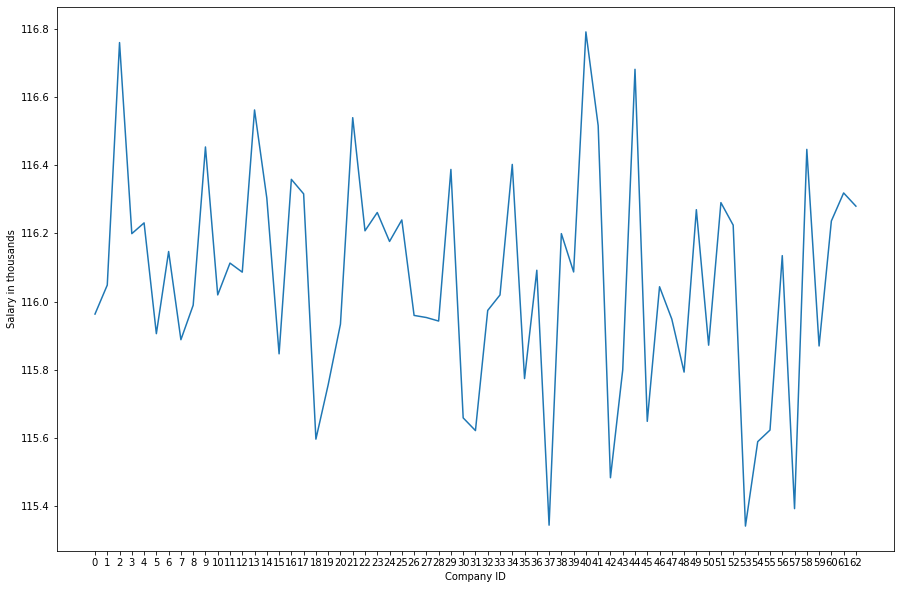

In [27]:
plt.figure(figsize = (15,10))
plt.plot(np.sort(training["id"].unique()),means )
plt.xticks(np.sort(training["id"].unique()))
plt.xlabel("Company ID")
plt.ylabel("Salary in thousands")
# add title

The graph shows the average salary paid in each distinct company. We can see how company ids 2 and 40 and 44 provide higher salaries compared to the rest. Even though we don't know the details of each company, it does make sense as more established companies (eg. Fortune500) would give higher salaries compared to a startup. 

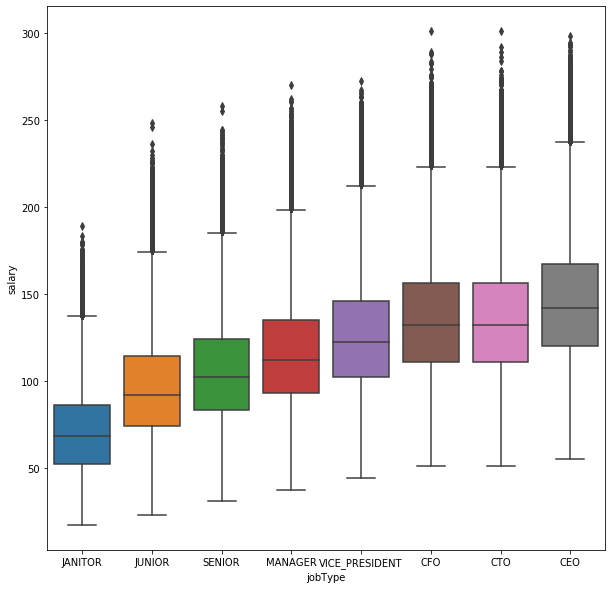

In [28]:
snsplots("jobType", ["JANITOR", "JUNIOR", "SENIOR", "MANAGER", "VICE_PRESIDENT", "CFO", "CTO", "CEO"],training)
# add title

The above shows the salary of all the job types according to their positions, and as it clearly can be seen that as you go higher up in the company, the salary increases (irrespective of which company). The data also confirms how the CFO and the CTO are on the same level since their average salaries are very similar. 

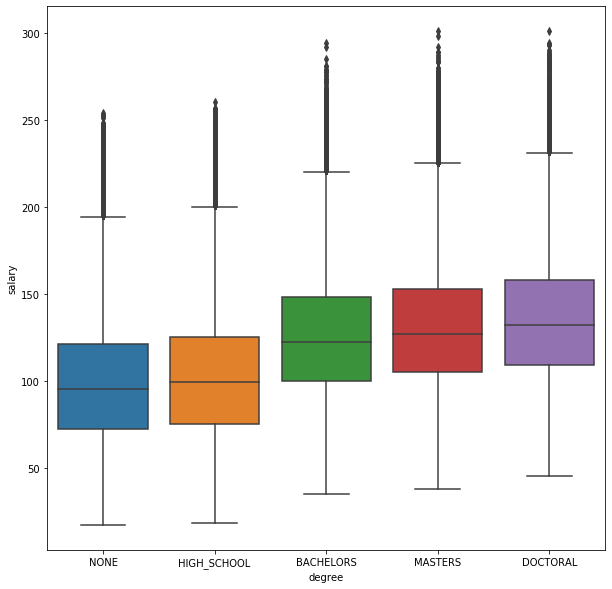

In [29]:
snsplots("degree", ["NONE", "HIGH_SCHOOL", "BACHELORS", "MASTERS", "DOCTORAL"],training)
# add title

The above shows the salary of individuals with their respective degrees, and the data confirms that a higher educational level leads to a higher salary. This is a positive correlation

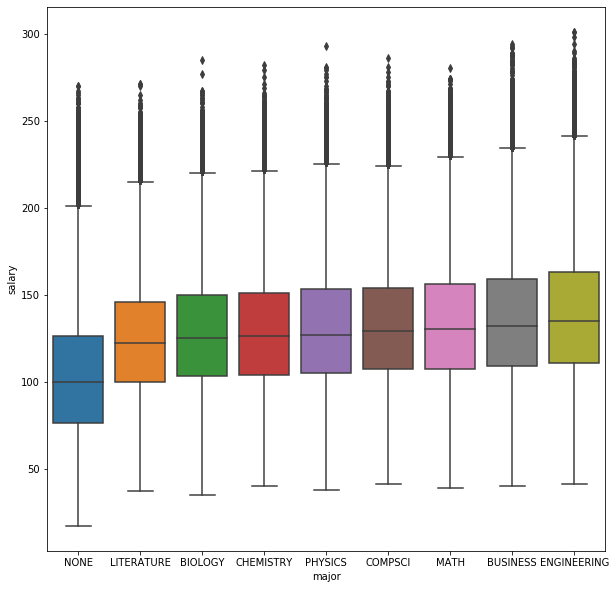

In [30]:
snsplots("major", ["NONE", "LITERATURE", "BIOLOGY", "CHEMISTRY", "PHYSICS", "COMPSCI", "MATH", "BUSINESS", "ENGINEERING"],training)
# add title

The above graph shows the ranges of salaries for different majors. People who do not major in anything are more likely to earn much less than others. The graph also suggests that business and engineering are the most desirable majors among employers since they have the highest average salaries.

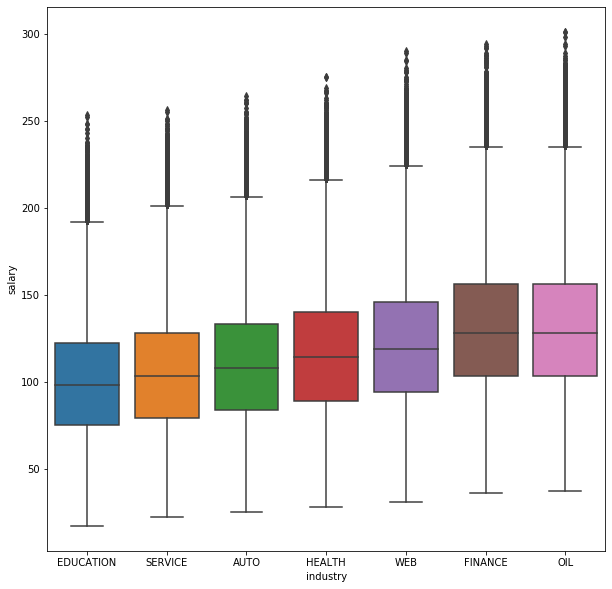

In [31]:
snsplots("industry", ["EDUCATION", "SERVICE", "AUTO", "HEALTH", "WEB", "FINANCE", "OIL"],training)
# add title

The above shows that the financial and oil businesses give the highest average salaries. On the other hand salaries in education are the lowest on average.

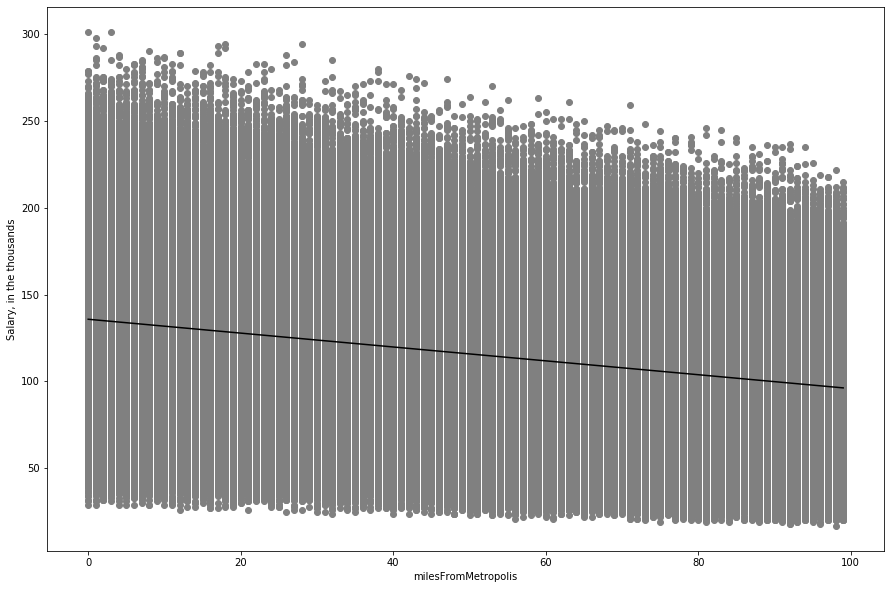

In [32]:
scatterplots("milesFromMetropolis", training)
# add title

Even though the graph above shows a huge variance of the salaries with the miles from metropolis, there does seem to be a negative correlation between the distance from the center of the city and the amount a person would earn. Even though it does not look like a very strong negative correlation, it still does seem to be the case. Being away from the city, generally refers to jobs that are in the factory, which in turn does not pay as much. However, the closer to the city, the more jobs like marketing, finance and computer science related jobs come in which provide a higer salary. One thing to also note is that with the rise of remote jobs and working online, the distance does not play as much a factor any more in determining the salary. With the increase in of tecnchonological development, factory jobs are becoming outdated (whose salaries are generally low); this in turn would required individuals to learn more advanced skills which would make them earn more money.

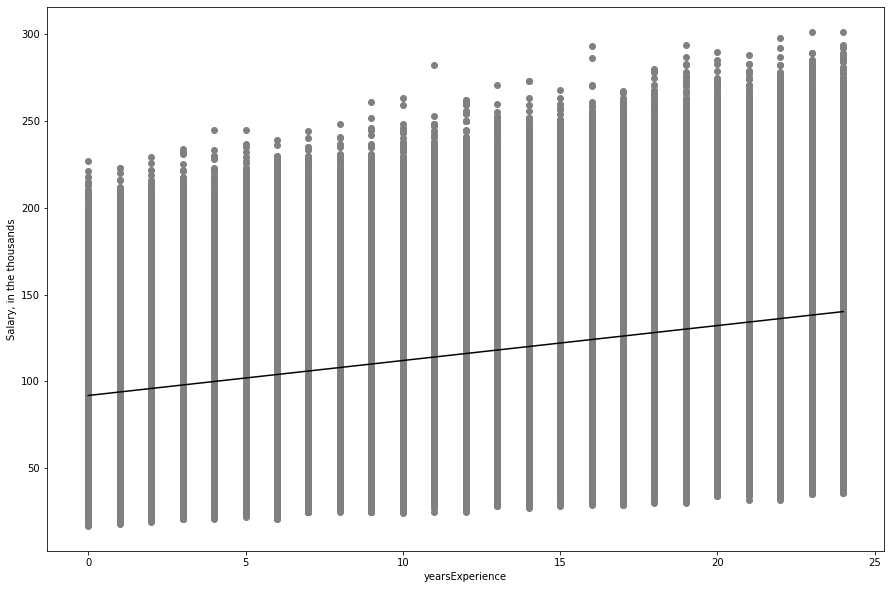

In [33]:
scatterplots("yearsExperience", training)
# add title

The above graph shows a positive correlation between the number of years of experience and the salary one attains. This is generally because the individual gets better with their job as they practice it more and more. To add, some companies have a policy of increasing their salary with every year a person works for them. There is also an implied understanding that with the more years a person works, the more likely they are to get promoted, which returns a higher salary. 

In [34]:
##features engineering done according to mean salary of each category
jobs = {"JANITOR":1, "JUNIOR":2, "SENIOR":3, "MANAGER":4, "VICE_PRESIDENT":5, "CFO":6, "CTO":7, "CEO":8}
degrees = {"NONE":1, "HIGH_SCHOOL":2, "BACHELORS":3, "MASTERS":4, "DOCTORAL":5} 
industrys = {"EDUCATION":1, "SERVICE":2, "AUTO":3, "HEALTH":4, "WEB":5, "FINANCE":6, "OIL":7}
majors = {"NONE":1, "LITERATURE":2, "BIOLOGY":3, "CHEMISTRY":4, "PHYSICS":5, "COMPSCI":6, "MATH":7, "BUSINESS":8, "ENGINEERING":9}

In [35]:
training["jobs-number"] = training["jobType"].map(jobs)
training["degree-number"] = training["degree"].map(degrees)
training["industry-number"] = training["industry"].map(industrys)
training["major-number"] = training["major"].map(majors)

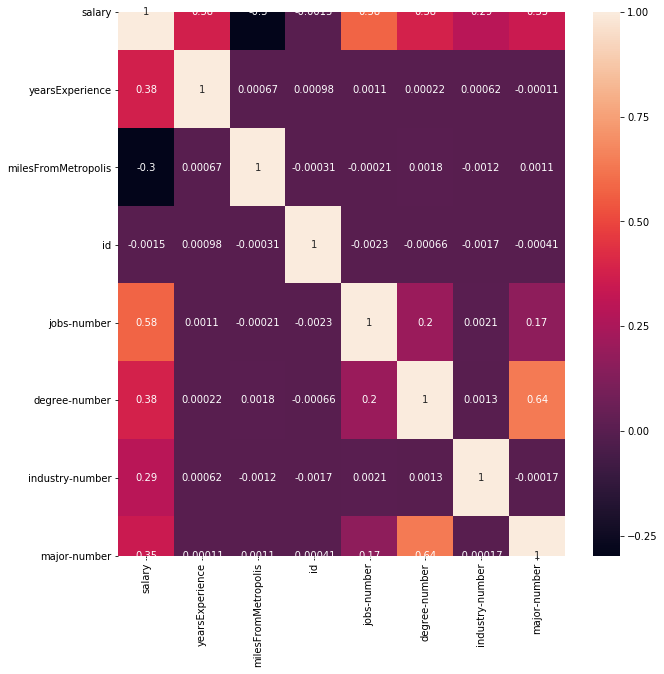

In [36]:
data = training[["salary", "yearsExperience","milesFromMetropolis", "id", "jobs-number", "degree-number", "industry-number", "major-number"]]
corrs =data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrs, annot=True)

The above confirms how all the factors considered affect one's salary. However, the graph also shows that there seems to be a somewhat strong relationship between the degree and the major that one takes. Also there seems to be a weak relationship between the job type and the major, and a weak relationship between the degree and the job type.

In [37]:
##Baseline machine learning model - before feature engineering was done 
lr = LinearRegression()
cv_scores = cross_val_score(lr, training[["yearsExperience", "milesFromMetropolis"]], training["salary"], cv=3, scoring='neg_mean_squared_error')
cv_scores*-1
##baseline mse

array([1156.79339647, 1157.89933448, 1150.74251809])

In [38]:
cv_scores = cross_val_score(lr, training[["yearsExperience", "milesFromMetropolis"]], training["salary"], cv=3)
cv_scores
##baseline accuracy

array([0.23002437, 0.22733763, 0.23083144])

In [39]:
numericvalues = ["yearsExperience", "milesFromMetropolis", "id", "jobs-number", "degree-number", "industry-number", "major-number","salary"]
training = training[numericvalues]

In [40]:
scaler = StandardScaler()
scaler.fit(training[numericvalues[:-1]])
trainin = scaler.transform(training[numericvalues[:-1]])
## due the memory problems - taking a subset
trainin = trainin[:100000]
result = training[numericvalues[-1]]
result = result[:100000]

In [41]:
mlmodels = []
mlmodels.append(('Linear Regression', LinearRegression()))
mlmodels.append((('Decision Tree Regressor'), DecisionTreeRegressor()))
mlmodels.append((('Gradient Boosting Regressor'), GradientBoostingRegressor()))
mlmodels.append((('Random Forest Regressor'), RandomForestRegressor(n_estimators = 30)))
mlmodels.append((('Ridge'), Ridge(alpha=1.0)))

In [42]:
for x in mlmodels:
    print(x[0])
    cv_scores = cross_val_score(x[1], trainin, result, cv=3, scoring='neg_mean_squared_error')
    print("MSE")
    print(cv_scores*-1)
    cv_scores = cross_val_score(x[1], trainin, result, cv=3)
    print("accuracy")
    print(cv_scores)

Linear Regression
MSE
[397.64158025 398.43473661 399.52479026]
accuracy
[0.73409406 0.73059275 0.73725778]
Decision Tree Regressor
MSE
[769.85686536 765.29934216 768.21382714]
accuracy
[0.48371219 0.48061832 0.49302875]
Gradient Boosting Regressor
MSE
[369.88384938 368.09454927 368.32735375]
accuracy
[0.75265587 0.75110769 0.75777436]
Random Forest Regressor
MSE
[412.30090651 409.3585028  415.14396848]
accuracy
[0.72456294 0.7228872  0.72786737]
Ridge
MSE
[397.64164744 398.43460588 399.52485085]
accuracy
[0.73409402 0.73059283 0.73725774]


From the above, we can see how the MSE has been reduced signficantly from the baseline model producing an MSE of 1150+. The best model that works is the Gradient Boosting Regressor, as it produces the lowest mse out of all the models.

In [47]:
gbr = GradientBoostingRegressor()
trainin = scaler.transform(training[numericvalues[:-1]])
gbr.fit(trainin, training[numericvalues[-1]])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
test_features["jobs-number"] = test_features["jobType"].map(jobs)
test_features["degree-number"] = test_features["degree"].map(degrees)
test_features["industry-number"] = test_features["industry"].map(industrys)
test_features["major-number"] = test_features["major"].map(majors)

In [49]:
##getting the numeric value of the company Id
ids = []
for x in test_features["companyId"]:
    ids.append(x[4:])
test_features["id"] = ids

In [50]:
test_features["predicted salary"] = gbr.predict(test_features[numericvalues[:-1]])

In [51]:
test_features.to_csv("predicted.csv")

In [84]:
gbr.feature_importances_

array([0.18966788, 0.12795079, 0.        , 0.42372476, 0.10675199,
       0.11553983, 0.03636475])

In [96]:
features = ['yearsExperience', 'mileFromMetropolis','id', 'jobs-number', 'degree-number', 'industry-number', 'major-number']

In [97]:
importances = gbr.feature_importances_
indices = np.argsort(importances)

In [98]:
indices

array([2, 6, 4, 5, 1, 0, 3])

In [103]:
feat = []
for x in indices:
    feat.append(features[x])

Text(0.5, 0, 'Relative Importance')

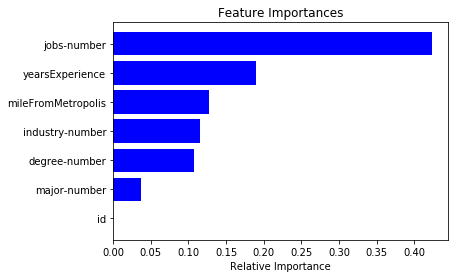

In [104]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feat)
plt.xlabel('Relative Importance')

From the above it can be seen how the biggest feature importance the gbr model gave was to jobs-number, which was the jobtype category in the dataset. After that came the years experience. 


Summary:

The main goal of this investigation was to analyze what the most important features are in determining one's salary. According to the correlations, we saw that the job types and the years of experience had the biggest correlation (jobs types much more than years of experience) with respect to salary, and coincidently those two features had the most importance in the gbr model. To add, the goal was to accurately predict the salary. From the baseline model, linear regression, without any feature engineering and testing out other models, we found out that the gradient boosting regression machine learning model was able to bring the mse down from a mean of 1155 to a mean of 369 and the accuracy up from 22.9% to 75.3%.